In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
iris = pd.read_csv("http://gagolewski.com/resources/data/iris.csv", comment="#")
tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment="#")
vehicles = pd.read_csv("http://gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz", comment="#")
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz", comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_flights.csv.gz", comment="#")
airports = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_airports.csv.gz", comment="#")
airlines = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_airlines.csv.gz", comment="#")
planes = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_planes.csv.gz", comment="#")

In [4]:
vehicles.head(1)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18


Given `fueleconomy::vehicles`, convert the values in
`cty` (city-) and `hwy` (highway-fuel economy -- given in mpg)
to l/100 km. Then add  new columns `z_cty` and `z_hwy`,
that give z-scores of `cty` and `hwy` (i.e., standardize these columns).
Moreover, add  two other columns `z_cty_rel` and `z_hwy_rel`, which denote the
corresponding z-scores relative to (grouped by) `class`.

In [9]:
vehicles.loc[:,"cty2"] = 235.215/vehicles.loc[:,"cty"]
vehicles.loc[:,"cty2"].head()

0    13.067500
1    13.067500
2    18.093462
3    18.093462
4    14.700938
Name: cty2, dtype: float64

In [10]:
vehicles.loc[:,"z_cty"] =                            \
    (vehicles.loc[:,"cty2"]-vehicles.loc[:,"cty2"].mean())/vehicles.loc[:,"cty2"].std()


In [11]:
vehicles.loc[:,"z_cty"].head()

0   -0.365269
1   -0.365269
2    1.020516
3    1.020516
4    0.085111
Name: z_cty, dtype: float64

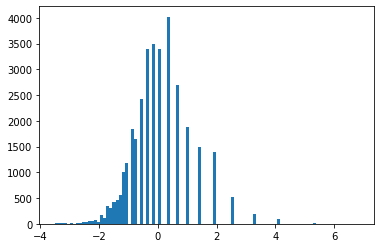

In [14]:
plt.hist(vehicles["z_cty"], bins=100);

In [15]:
vehicles.loc[:,"z_cty_rel"] = vehicles.groupby("class")["cty2"].transform(
    lambda cty_grouped: (cty_grouped-cty_grouped.mean())/cty_grouped.std()
)

In [16]:
def standardise(x): 
    return (x-x.mean())/x.std()
    
vehicles.loc[:,"z_cty_rel"] = vehicles.groupby("class")["cty2"].transform(standardise)
vehicles.loc[:,"z_cty_rel"].head()

0   -0.742395
1   -0.742395
2    0.801337
3    0.801337
4   -0.240682
Name: z_cty_rel, dtype: float64

In [20]:
vehicles[["ctyr","hwyr"]]=    \
    vehicles.groupby("class")[["cty","hwy"]].transform(standardise)
vehicles.head(1)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,cty2,z_cty,z_cty_rel,ctyr,hwyr
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.0675,-0.365269,-0.742395,0.517432,-0.702538


In [21]:
standardise(vehicles.loc[:6,["cty", "hwy"]])

,cty,hwy
0,1.299038,0.377964
1,1.299038,0.377964
2,-0.866025,-0.944911
3,-0.866025,-0.944911
4,0.433013,0.377964
5,-0.866025,-0.944911
6,-0.433013,1.700840


## New York City Flights examples
Here, we will work on exercises to switch back and forth between SQL queries and python (pandas) syntax for pulling the same data.

In [31]:
# NYC flights 2013
flights.shape

(336776, 19)

In [32]:
flights.head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00


In [33]:
airlines.tail(5)

,carrier,name
11,UA,United Air Lines Inc.
12,US,US Airways Inc.
13,VX,Virgin America
14,WN,Southwest Airlines Co.
15,YV,Mesa Airlines Inc.


In [34]:
planes.head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


In [35]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [36]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [37]:
import sqlite3

In [38]:
conn = sqlite3.connect("/tmp/nycflights.db") # you: nycflights.db

In [39]:
flights.to_sql("flights", conn)
weather.to_sql("weather", conn)
planes.to_sql("planes", conn)
airports.to_sql("airports", conn)
airlines.to_sql("airlines", conn)

In [40]:
pd.read_sql_query("""
    SELECT * FROM airlines  WHERE name LIKE '%AMERICA%'
""", conn)

,index,carrier,name
0,1,AA,American Airlines Inc.
1,13,VX,Virgin America


   1. `SELECT DISTINCT engine FROM planes`
   

In [83]:
pd.read_sql_query("""SELECT DISTINCT engine FROM planes""", conn)

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


Python: 

In [87]:
pd.DataFrame(planes.engine.unique(), columns=["engine"])

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


In [93]:
planes.loc[:,["engine"]].drop_duplicates().reset_index(drop=True)

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


   2. `SELECT DISTINCT type, engine FROM planes`
   

Python:

In [94]:
planes.loc[:,["type","engine"]].drop_duplicates().reset_index(drop=True)

,type,engine
0,Fixed wing multi engine,Turbo-fan
1,Fixed wing multi engine,Turbo-jet
2,Fixed wing single engine,Reciprocating
3,Fixed wing multi engine,Reciprocating
4,Fixed wing single engine,4 Cycle
5,Rotorcraft,Turbo-shaft
6,Fixed wing multi engine,Turbo-prop


   3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
   

Python:

In [50]:
planes['engine'].value_counts()

Turbo-fan        2750
Turbo-jet         535
Reciprocating      28
Turbo-shaft         5
Turbo-prop          2
4 Cycle             2
Name: engine, dtype: int64

   4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`
   

Python:

In [100]:
planes.groupby(["engine","type"]).size().rename("COUNT").reset_index()

,engine,type,COUNT
0,4 Cycle,Fixed wing single engine,2
1,Reciprocating,Fixed wing multi engine,5
2,Reciprocating,Fixed wing single engine,23
3,Turbo-fan,Fixed wing multi engine,2750
4,Turbo-jet,Fixed wing multi engine,535
5,Turbo-prop,Fixed wing multi engine,2
6,Turbo-shaft,Rotorcraft,5


In [58]:
pd.DataFrame(planes.groupby(["engine","type"]).count()['year'].rename('Count'))

Count
engine        type                           
4 Cycle       Fixed wing single engine      1
Reciprocating Fixed wing multi engine       5
              Fixed wing single engine     16
Turbo-fan     Fixed wing multi engine    2697
Turbo-jet     Fixed wing multi engine     526
Turbo-prop    Fixed wing multi engine       2
Turbo-shaft   Rotorcraft                    5

   5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

Python:

In [102]:
planes.groupby(["manufacturer", "engine"]).year.\
    agg([np.min, np.mean, np.max]).reset_index()

,manufacturer,engine,amin,mean,amax
0,AGUSTA SPA,Turbo-shaft,2001.0,2001.000000,2001.0
1,AIRBUS,Turbo-fan,2002.0,2007.281734,2013.0
2,AIRBUS,Turbo-jet,2002.0,2002.000000,2002.0
3,AIRBUS INDUSTRIE,Turbo-fan,1992.0,1998.599251,2013.0
4,AIRBUS INDUSTRIE,Turbo-jet,1989.0,1997.439024,2004.0
5,AMERICAN AIRCRAFT INC,Reciprocating,NaN,NaN,NaN
6,AVIAT AIRCRAFT INC,Reciprocating,2007.0,2007.000000,2007.0
7,AVIONS MARCEL DASSAULT,Turbo-fan,1986.0,1986.000000,1986.0
8,BARKER JACK L,Reciprocating,NaN,NaN,NaN
9,BEECH,Turbo-prop,1967.0,1969.500000,1972.0


In [105]:
planes.groupby(["manufacturer", "engine"]).year.describe().loc[:,["min","mean","max"]].\
    reset_index()

,manufacturer,engine,min,mean,max
0,AGUSTA SPA,Turbo-shaft,2001.0,2001.000000,2001.0
1,AIRBUS,Turbo-fan,2002.0,2007.281734,2013.0
2,AIRBUS,Turbo-jet,2002.0,2002.000000,2002.0
3,AIRBUS INDUSTRIE,Turbo-fan,1992.0,1998.599251,2013.0
4,AIRBUS INDUSTRIE,Turbo-jet,1989.0,1997.439024,2004.0
5,AMERICAN AIRCRAFT INC,Reciprocating,NaN,NaN,NaN
6,AVIAT AIRCRAFT INC,Reciprocating,2007.0,2007.000000,2007.0
7,AVIONS MARCEL DASSAULT,Turbo-fan,1986.0,1986.000000,1986.0
8,BARKER JACK L,Reciprocating,NaN,NaN,NaN
9,BEECH,Turbo-prop,1967.0,1969.500000,1972.0


In [107]:
planes.groupby(["manufacturer", "engine"]).agg({
        "year": [np.min, np.mean, np.max]
}).reset_index()

manufacturer         engine    year                     
                                                    amin         mean    amax
0                      AGUSTA SPA    Turbo-shaft  2001.0  2001.000000  2001.0
1                          AIRBUS      Turbo-fan  2002.0  2007.281734  2013.0
2                          AIRBUS      Turbo-jet  2002.0  2002.000000  2002.0
3                AIRBUS INDUSTRIE      Turbo-fan  1992.0  1998.599251  2013.0
4                AIRBUS INDUSTRIE      Turbo-jet  1989.0  1997.439024  2004.0
5           AMERICAN AIRCRAFT INC  Reciprocating     NaN          NaN     NaN
6              AVIAT AIRCRAFT INC  Reciprocating  2007.0  2007.000000  2007.0
7          AVIONS MARCEL DASSAULT      Turbo-fan  1986.0  1986.000000  1986.0
8                   BARKER JACK L  Reciprocating     NaN          NaN     NaN
9                           BEECH     Turbo-prop  1967.0  1969.500000  1972.0
10                           BELL    Turbo-shaft  1975.0  1984.500000  1994.0
11                         BOEING      Turbo-fan  1965.0  2001.210400  2013.0
12                         BOEING      Turbo-jet  1984.0  1996.368272  2005.0
13                 BOMBARDIER INC      Turbo-fan  1998.0  2004.486188  2013.0
14                       CANADAIR      Turbo-fan  1997.0  1997.333333  1998.0
15                   CANADAIR LTD      Turbo-jet  1974.0  1974.000000  1974.0
16                         CESSNA        4 Cycle  1975.0  1975.000000  1975.0
17                         CESSNA  Reciprocating  1959.0  1971.142857  1983.0
18                         CESSNA      Turbo-fan  1979.0  1979.000000  1979.0
19             CIRRUS DESIGN CORP  Reciprocating  2007.0  2007.000000  2007.0
20                    DEHAVILLAND  Reciprocating  1959.0  1959.000000  1959.0
21                        DOUGLAS  Reciprocating  1956.0  1956.000000  1956.0
22                        EMBRAER      Turbo-fan  1998.0  2003.613014  2013.0
23                        EMBRAER      Turbo-jet  1999.0  1999.000000  1999.0
24                 FRIEDEMANN JON  Reciprocating  2007.0  2007.000000  2007.0
25           GULFSTREAM AEROSPACE      Turbo-fan  1992.0  1992.000000  1992.0
26           GULFSTREAM AEROSPACE      Turbo-jet  1976.0  1976.000000  1976.0
27             HURLEY JAMES LARRY  Reciprocating     NaN          NaN     NaN
28                    JOHN G HESS        4 Cycle     NaN          NaN     NaN
29                   KILDALL GARY  Reciprocating  1985.0  1985.000000  1985.0
30                LAMBERT RICHARD  Reciprocating     NaN          NaN     NaN
31                    LEARJET INC      Turbo-fan     NaN          NaN     NaN
32                LEBLANC GLENN T  Reciprocating  1985.0  1985.000000  1985.0
33                     MARZ BARRY  Reciprocating  1993.0  1993.000000  1993.0
34              MCDONNELL DOUGLAS      Turbo-fan  1986.0  1989.704545  1997.0
35              MCDONNELL DOUGLAS      Turbo-jet  1975.0  1990.714286  1998.0
36  MCDONNELL DOUGLAS AIRCRAFT CO      Turbo-fan  1987.0  1989.737864  1993.0
37  MCDONNELL DOUGLAS CORPORATION      Turbo-jet  1991.0  1991.928571  1992.0
38                    PAIR MIKE E  Reciprocating     NaN          NaN     NaN
39                          PIPER  Reciprocating  1968.0  1976.400000  1980.0
40         ROBINSON HELICOPTER CO    Turbo-shaft  2012.0  2012.000000  2012.0
41                       SIKORSKY    Turbo-shaft  1985.0  1985.000000  1985.0
42                   STEWART MACO  Reciprocating  1985.0  1985.000000  1985.0

   6. `SELECT * FROM planes WHERE speed IS NOT NULL`
   

Python:

In [109]:
planes.loc[planes.speed.notna(),:].reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating


In [111]:
planes.loc[~planes.speed.isna(),:].reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating


In [114]:
np.nan == np.nan, 1.0==1.0

(False, True)

   7. `SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012`
   

Python:

In [122]:
planes.query('150<=seats<=190 and year >= 2012').loc[:,["tailnum"]].\
    reset_index(drop=True).head(1)

,tailnum
0,N361VA


In [123]:
planes.loc[planes.seats.between(150,190) & (planes.year>=2012),["tailnum"]].\
    reset_index(drop=True).head(1)

,tailnum
0,N361VA


In [124]:
planes.loc[(planes.seats>=150) & (planes.seats<=190) & (planes.year>=2012),["tailnum"]].\
    reset_index(drop=True).head(1)

,tailnum
0,N361VA


   8. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390`

Python:

In [126]:
planes.query('seats>390 and manufacturer in ["BOEING", "AIRBUS", "EMBRAER"]').\
    reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan


In [127]:
planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"]) & (planes.seats>390)          
           ,:].\
    reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan


   9. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`
   10. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`
   

In [129]:
planes.query('year>=2012').loc[:,["year","seats"]].drop_duplicates().\
    sort_values(['year', 'seats'], ascending=[True, False]).reset_index(drop=True)

,year,seats
0,2012.0,379
1,2012.0,377
2,2012.0,260
3,2012.0,222
4,2012.0,200
5,2012.0,191
6,2012.0,182
7,2012.0,149
8,2012.0,140
9,2012.0,20


In [130]:
planes.query('year>=2012').loc[:,["year","seats"]].drop_duplicates().\
    sort_values(['seats','year'], ascending=[False,True]).reset_index(drop=True)

,year,seats
0,2012.0,379
1,2013.0,379
2,2012.0,377
3,2013.0,377
4,2012.0,260
5,2012.0,222
6,2013.0,222
7,2012.0,200
8,2013.0,200
9,2013.0,199


   11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer`


Python:

In [133]:
(
    planes.query('seats>200').    # DataFrame
    groupby('manufacturer').      # DataFrameGroupBy [→GroupBy]
    size().                       # Series [values=counts, index=manufacturer]
    rename('count').              
    reset_index().                # DataFrame [manufacturer, count]
    query('count>10').            # DataFrame
    reset_index(drop=True)
)

,manufacturer,count
0,AIRBUS,66
1,BOEING,225


   12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`

Python:

In [137]:
manufacturers_of_large_planes = (
    planes.loc[planes.seats>200,:].
    groupby('manufacturer').      # DataFrameGroupBy [→GroupBy]
    size().                       # Series [values=counts, index=manufacturer]
    rename('count').              
    reset_index()
)
manufacturers_of_large_planes.loc[manufacturers_of_large_planes["count"]>10,:].\
    reset_index(drop=True)

,manufacturer,count
0,AIRBUS,66
1,BOEING,225


   13. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5`   

Python:

In [160]:
planes.groupby("manufacturer").size().rename('howmany').reset_index().\
    sort_values('howmany', ascending=False).reset_index(drop=True).head(5)
planes.groupby("manufacturer").size().rename('howmany').\
    sort_values(ascending=False).reset_index().head(5)
planes.groupby("manufacturer").size().rename('howmany').\
    nlargest(5).reset_index()

,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


   14. `SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum`
   

Python:

In [161]:
# pd.merge(flights, planes, how='left', on='tailnum')
# flights.merge(planes, how='left', on='tailnum')

   15.

      ```
      SELECT planes.*, airlines.* FROM
       (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
      INNER JOIN planes ON cartail.tailnum=planes.tailnum
      INNER JOIN airlines ON cartail.carrier=airlines.carrier
      ```
      

Python:

In [162]:
flights.loc[:,['carrier', 'tailnum']].drop_duplicates().\
    merge(planes, on='tailnum').merge(airlines, on='carrier')

,carrier,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,name
0,UA,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,United Air Lines Inc.
1,UA,N24211,1998.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,United Air Lines Inc.
2,UA,N39463,2012.0,Fixed wing multi engine,BOEING,737-924ER,2,191,NaN,Turbo-fan,United Air Lines Inc.
3,UA,N29129,1998.0,Fixed wing multi engine,BOEING,757-224,2,178,NaN,Turbo-jet,United Air Lines Inc.
4,UA,N53441,NaN,Fixed wing multi engine,BOEING,737-924ER,2,191,NaN,Turbo-fan,United Air Lines Inc.
5,UA,N76515,2008.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,United Air Lines Inc.
6,UA,N53442,2009.0,Fixed wing multi engine,BOEING,737-924ER,2,191,NaN,Turbo-fan,United Air Lines Inc.
7,UA,N459UA,2000.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan,United Air Lines Inc.
8,UA,N33289,2004.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,United Air Lines Inc.
9,UA,N497UA,2002.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan,United Air Lines Inc.
